In [33]:
import pygmt
import numpy as np
import os.path as osp

In [34]:
# Choose fonts: to learn more, search gmt.conf on pygmt webpage
pygmt.config(FONT='10p,Times-Roman,black')
pygmt.config(FONT_LABEL='10p,Times-Roman,black')
pygmt.config(FONT_TITLE='14p,Times-Roman,black')
pygmt.config(MAP_TITLE_OFFSET='2.0p')
pygmt.config(FORMAT_GEO_MAP="ddd")

In [35]:
# Set Regional Map dimensions
west, east, south, north = -132.0, -117.0, 36.0, 52.0
region_data = np.array([west, east, south, north])

dlon_edge, dlat_edge = 0.35, 1.0
region1 = f"{west}/{east}/{south}/{north}"

# Get center position and two latitude locations to define regional projection
clon, clat = np.mean([west, east]), np.mean([south, north])
lat1 = np.floor(clat + 0.5 * (north - clat))
lat2 = np.floor(clat - 0.5 * (clat - south))

mapwidth = 4.5 # inches, sets size of figure on page
proj1 = f"B{clon}/{clat}/{lat1}/{lat2}/{mapwidth}i"


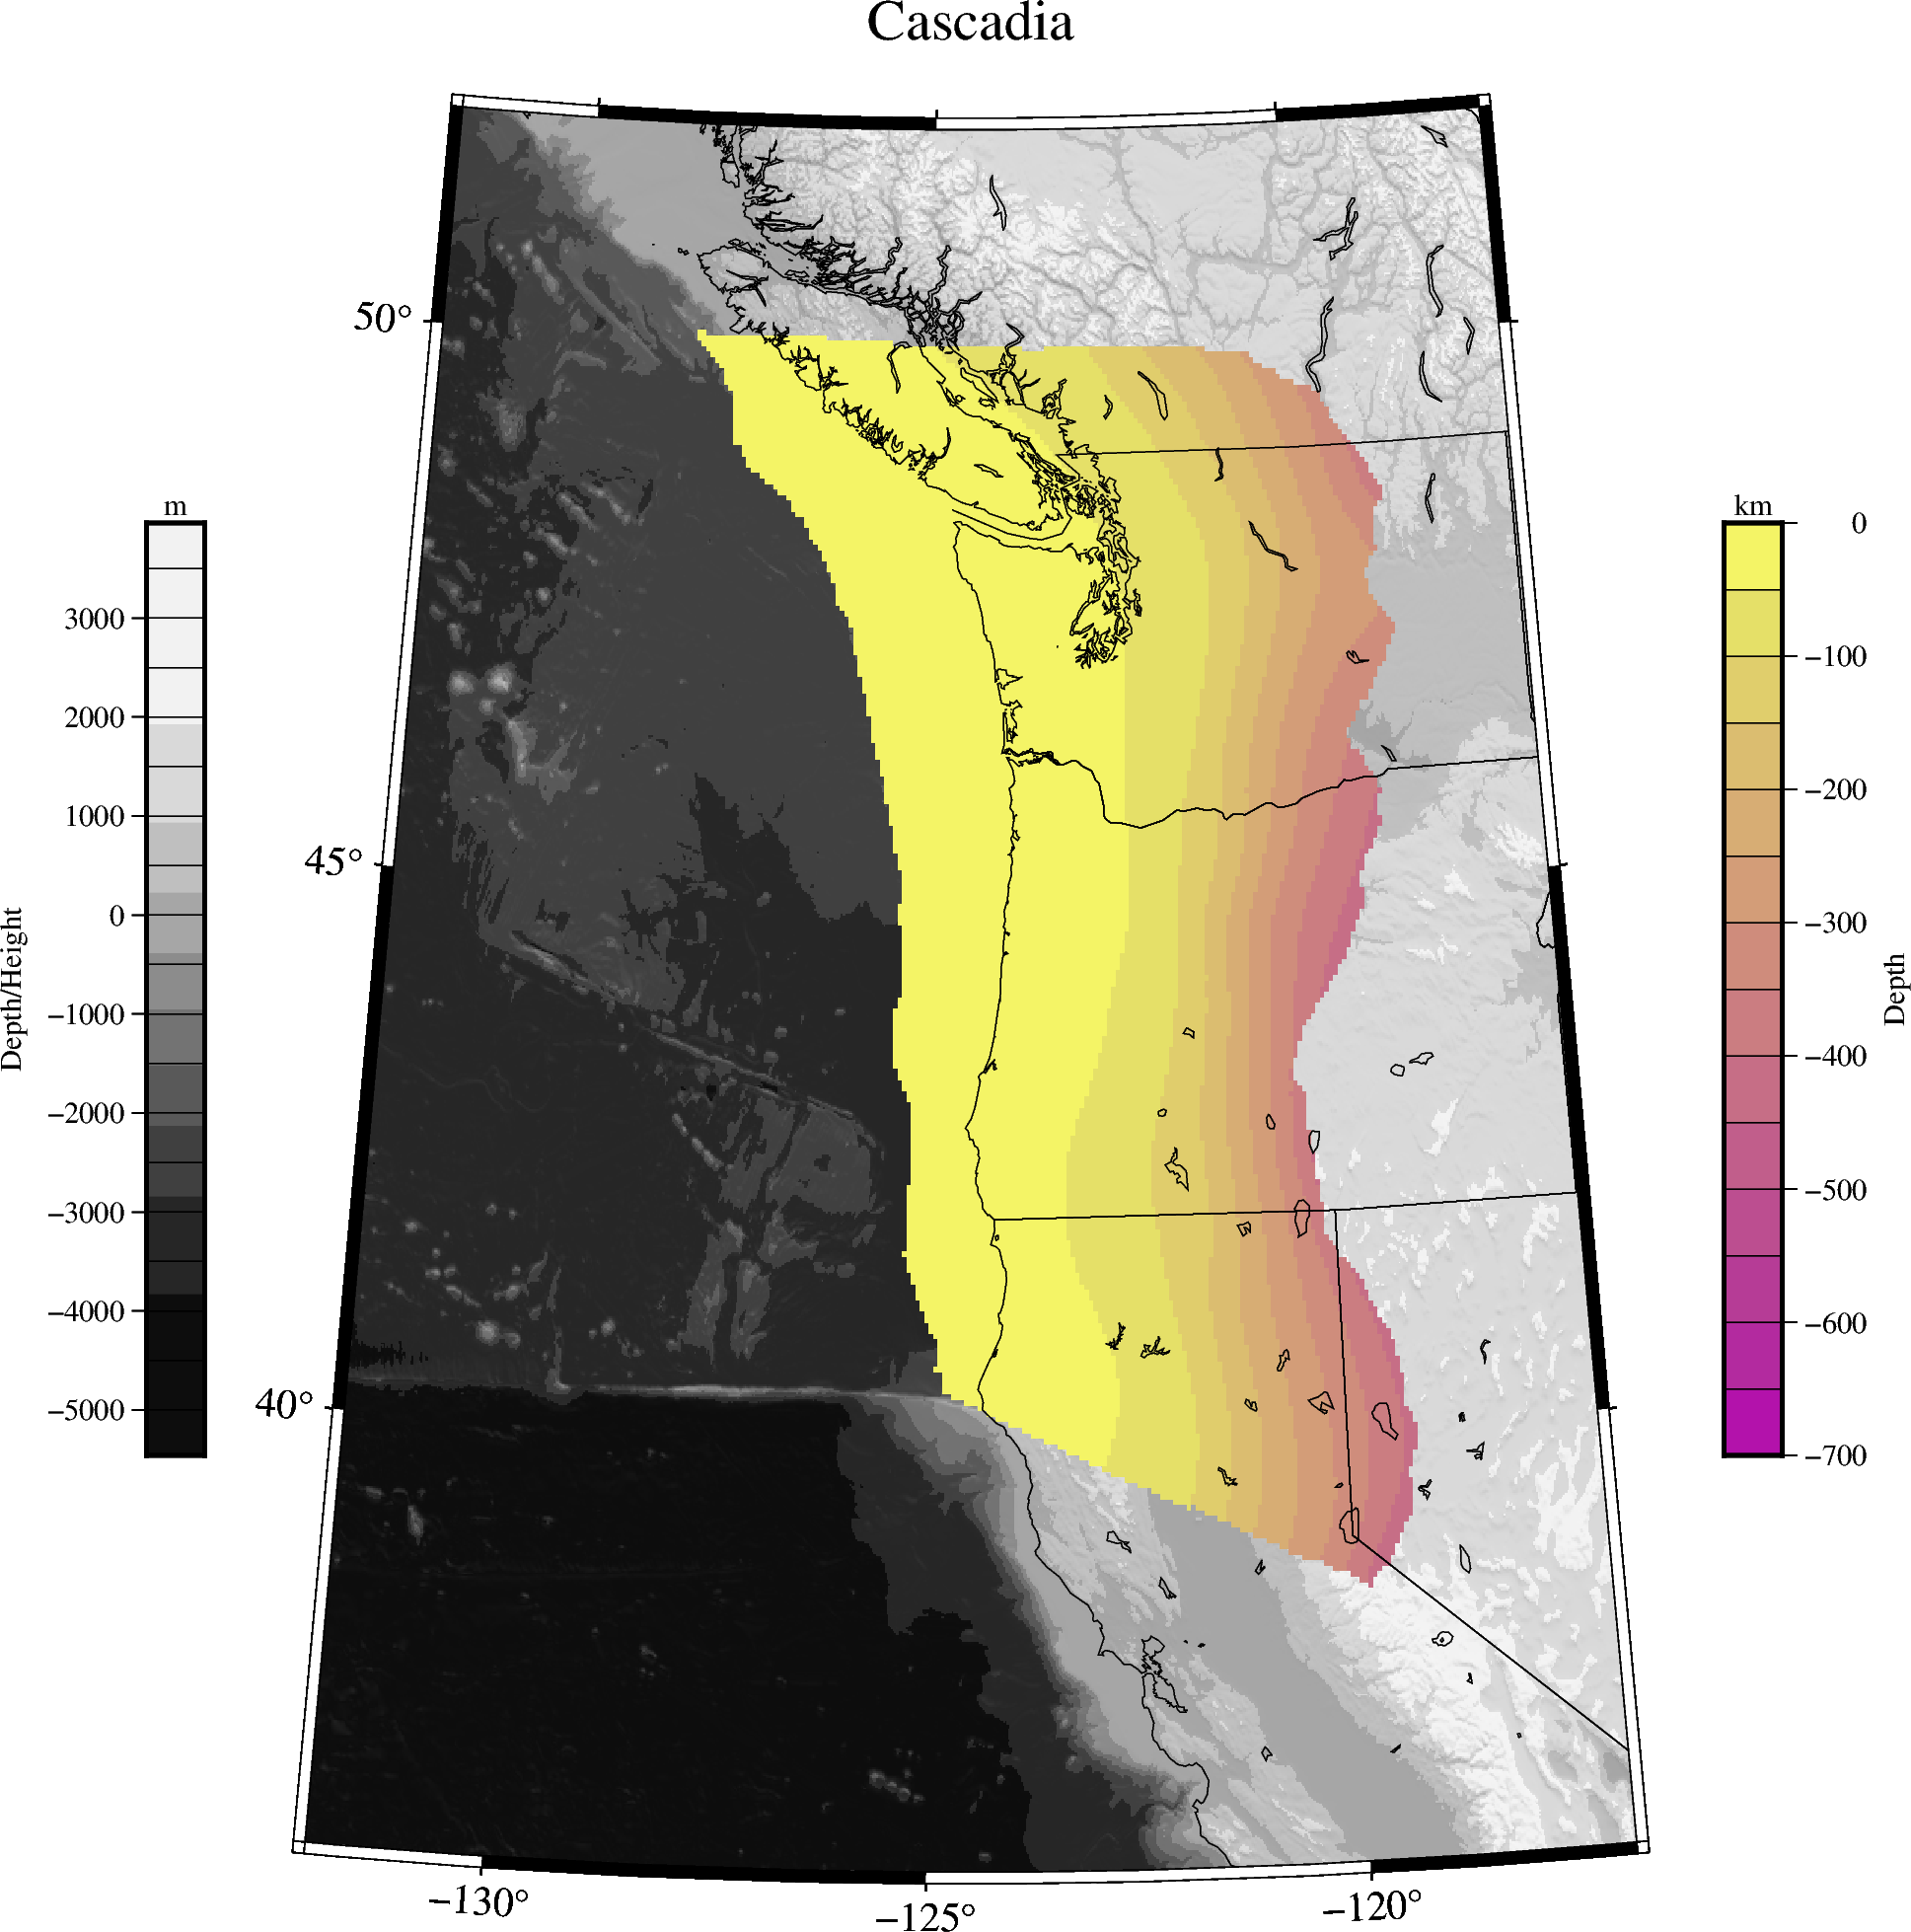

In [36]:
# Start figure
fig = pygmt.Figure()
fig.basemap(region=region1, projection=proj1, frame=["a5f2.5", f'WSne'])
topogrid = pygmt.datasets.load_earth_relief(region=region1, resolution="01m", registration="pixel")
pygmt.grd2cpt(grid=topogrid, cmap="gray")
shade = pygmt.grdgradient(grid=topogrid, azimuth=10)
fig.grdimage(grid=topogrid, shading=shade)

# Plot the first colorbar on the left side
fig.colorbar(position="JML+0.75c/0c+w8c/0.5c", box=False, frame=["a1000g500", "x+lDepth/Height", "y+lm"])

slabcptfile = "slabdepth.cpt"
pygmt.makecpt(cmap="buda", series=(-700, 0, 50), output=slabcptfile)

# Directory where data is kept - change this to your directory
slab2dir = "../../data/Slab2/"
depth_grdfile = osp.join(slab2dir, "cas_slab2_dep_02.24.18.grd")

fig.grdimage(grid=depth_grdfile, nan_transparent=True, cmap=slabcptfile)

# Plot the second colorbar on the right side
fig.colorbar(cmap=slabcptfile, position="JMR+o0.75c/0c+w8c/0.5c", box=False, frame=["a100g50", "x+lDepth", "y+lkm"])

fig.coast(region=region1,
          frame=["a", "+tCascadia"],
          shorelines=True,
          borders=[1, 2, 3],
          projection=proj1)

fig.show()